# Exploring effects of order and multiplicity of spherical harmonic representations in protein-ligand docking
Ada Fang, Tom Cobley

## Introduction
Spherical harmonics are useful for constructing equivariant models that respect the rotational symmetry of data. Incorporation of SE(3) equivariance with spherical harmonics in DiffDock \cite{corso2022diffdock} has resulted in achieving state-of-the-art accuracy in blind protein-ligand docking.<sup>*</sup>
DiffDock is a SE(3)-equivariant generative model with a diffusion process over the non-Euclidean manifold of ligand conformations which learns the best ligand conformations for a given protein. Their diffusion model uses convolutional networks which are based on tensor products of irreducible representations of SO(3). In this work, we aim to conduct a study on the effect of different orders and multiplicities of spherical harmonic representations on training behaviour and generalisation ability of the model. We aim to provide more insight into possible trade-offs relating to this important design choice, and a deeper understanding of the effects of this choice.

<sup>*</sup>Blind docking differs from traditional docking in that the location of the binding site is not known. Therefore, the docking algorithm is required to predict the best binding site as well as the best pose for the ligand in that site.

## Related Work
### Protein-ligand docking
EquiBind \cite{stark2022equibind} and TANKBind \cite{lu2022tankbind} are other graph neural network-based models that aim to solve the blind protein-ligand docking problem. Both of these models are SE(3)-equivariant, but they do not use spherical harmonic representations. These models are both regression-based and are trained to minimise the error (distance) between ligand position predictions and ground truth. In contrast, DiffDock treats protein-ligand docking as a generative modelling problem by learning the distribution of ligand conformations for a protein. DiffDock significantly outperforms the other two methods (and all other baselines), setting the current state-of-the-art for blind protein-ligand docking. 

### Experiments with different spherical harmonic irreps
There is limited work using spherical harmonic irreps for the specific problem of protein-ligand docking (to the best of our knowledge, only DiffDock has explored this so far). However, this approach has been successfully applied to a range of other interesting problems, which we hope to take inspiration from. We are particularly interested in existing work which investigates the effect of the order and multiplicity of spherical harmonic irreps on model training characteristics, so we have selected the following publications from the field of molecular dynamics which have conducted such studies.

### Batzner et al., 2022
Batzner et al. \cite{batzner20223} presented Neural Equivariant Interatomic Potentials (NequIP), an E(3)-equivariant message passing neural network for learning interatomic potentials for molecular dynamics using E(3)-equivariant convolutions, (implemented with \texttt{e3nn} \cite{geiger_e3nn_2022}). NequIP demonstrates exceptional data efficiency (outperforming existing models while using up to three orders of magnitude fewer training data). To investigate remarkable data efficiency, the authors conducted a set of experiments in which they explicitly disabled interactions of a higher order than $l_{max} \in \{0,1,2,3\}$ and evaluated the rate at which their model was able to learn interatomic potentials for water and aspirin molecules
\footnote{$l_{max}$ represents the maximum angular momentum quantum number of the spherical harmonic irreps.}
. The learning curves of test error $\epsilon$ against number of training points $N$ were observed to follow the empirical deep learning power-law $\epsilon = a N^b$, where $a$ and $b$ are real constants \cite{hestness2017deep}. These results are shown in (Fig. 5 in \cite{batzner20223}). The \textit{learning exponent}, $b$, in this power-law relationship (or equivalently the slope of the line log-log space), represents how fast the model learns as more training data becomes available. For both water and aspirin molecules, the magnitude of learning exponent increased significantly from $l_{max}=0$, an invariant model, to $l_{max}=1$ an equivariant model, showing that equivariant models are able to learn faster as new data becomes available. This is a particularly interesting result as it breaks the empirical pattern shown in previous work that this learning exponent remains fixed for different learning methods (\cite{hestness_deep_2017}.  Further increases in $l_{max}$ resulted in further, smaller improvements in predictive accuracy but no change in learning exponent.

#### Controlling for model capacity
A larger choice of $l$ directly increases the number of learnable parameters in the model, so it is important to account for this in experiments on training behaviour. Batzner et al. perform an additional weight-controlled experiment by training an invariant and an equivariant model with the same number of parameters (by increasing the multiplicities of the $l=0$ irreps in the invariant model to match the capacity of the equivariant model). The larger $l=0$ model performed comparably with the original, smaller $l=0$ model, verifying that the performance boost comes from the expressivity of equivariance rather than the increased model capacity. Hence, for interatomic potentials, this paper highlights the importance of equivariant models for accuracy and data efficiency.

### Owen et al., 2023
Owen et al. \cite{owen2023complexity} performed a similar experiment to Batzner et al., evaluating the learning exponent of the same model on the force fields of transition metals. They experimented with even higher $l_{max} \in \{0,1,2,3,4,5\}$. For Au, Cu, Os, and Ti, they observed (as before) that higher $l$ yields greater magnitude learning exponents and lower predictive error. Interestingly, they observed significant continued improvements in predictive error and learning exponents for increased $l_{max}$ up to $l_{max} = 3$ before returns diminished. This is in contrast to the previous work which showed that water and aspirin molecules experience diminishing returns after $l_{max} = 1$. 

Intuitively, transition metals could require higher-order spherical harmonics due to the higher symmetry of their $d$-orbitals, which is in contrast to the lower symmetry orbitals of water and aspirin. It would be interesting to extrapolate these observations to the problem of protein-ligand docking, which is also a relatively low symmetry system. We suspect that learning rate and model improvement will benefit from an equivariant model, and will saturate at a lower $l$ similar to the water, apsirin examples.


## Background
DiffDock is denoising diffusion model over the space of ligand conformations with respect to a fixed protein target. A ligand conformation $x$ lies in space $\mathbb{R}^{3n}$ which is a $\mathbb{R}^{3}$ vector for each of the $n$ atoms. Ligand conformations cannot diffuse over all of $\mathbb{R}^{3n}$, and thus DiffDock considers the manifold of more feasible ligand conformations given by the product of three vector spaces, $\mathbb{P} = \mathbb{T}_3 \times SO(3) \times SO(2)^m$:

* Position of the ligand with respect to the protein: $\mathbb{T}_3 \cong \mathbb{R}^3$. The model is $SE(3)$-equivariant to translations, $\mathrm{A_{tr}}: \mathbb{T}_3 \times \mathbb{R}^3 \rightarrow \mathbb{R}^3$ where $\mathrm{A_{tr}} (r,x)_i = x_i + r$, for each atom $i\in [1,n]$.
* Rotation of the ligand with respect to the protein: $SO(3)$. The model is $SE(3)$-equivariant to rotations, $\mathrm{A_{rot}}: SO(3) \times \mathbb{R}^3 \rightarrow \mathbb{R}^3$ where $\mathrm{A_{rot}} (R,x)_i = R(x_i-\bar{x}) + \bar{x}$, for each atom $i\in [0,n]$ and $\bar{x}=\frac{1}{n}\sum_{i}x_i$ is the unweighted center of mass of the ligand.
* Torsion angles within the ligand: $SO(2)^m$ where there are $m$ torsion angles in the molecule. The model is $SE(3)$-invariant to torsion angle updates, $\mathrm{A_{tor}}: SO(2)^m \times \mathbb{R}^3 \rightarrow \mathbb{R}^3$ where $\mathrm{A_{tor}} (\theta,x)_i = \mathrm{RMSDAlign}(x, (B_{1,\theta_1}\circ \cdots \circ B_{m,\theta_m})(x))$. $B_{k,\theta_k}$ is the torsion update of angle $\theta_k$ around bond $k$ and RMSDAlign finds the rigid body displacement of the ligand with torsion angle updates that is closest in RMSD to the original ligand position at $x$.

We will draw on concepts of equivariance and invariance from class to understand these models to test how the model maintains equivariance and invariance with these transformations. 

In denoising diffusion models the forward process is the application of noise over time $t$ until the ligand is just random noise, and the model aims to learn the reverse process to reconstruct the ligand given the noisy ligand pose and $t$. During training the model first samples a time $t$ and the corresponding noise that would be applied on each component of the product space $(r_t, R_t, \boldsymbol{\theta}_t)$. The noise is applied to the ligand $x_t = A((r_t, R_t, \boldsymbol{\theta}_t), x_0)$, where $x_0$ is the starting ligand pose. Then the score model $s(x_t, y, t) = \alpha \in \mathbb{R}^3, \beta \in \mathbb{R}^3, \gamma \in \mathbb{R}^3$ is given the noisy ligand pose $x_t$, the protein $y$, and time $t$ to predict the score of the distribution on each component $\nabla \log p_t^{tr}(r_t|r_0), \nabla \log p_t^{rot}(R_t|R_0), \nabla \log p_t^{tor}(\boldsymbol{\theta}_t|\boldsymbol{\theta}_0)$ respectively.

The score model is a neural network comprised of the following layers:
* Embedding layer: A radial graph with distance based cutoffs is constructed for the ligand atoms and the C$\alpha$ atoms of each amino acids residue in the protein. The ligand atoms have molecular features such as: atomic element, chirality, formal charge etc. The amino acids use features from ESM \cite{rives_biological_2021} embeddings, a protein sequence language model. Finally the edge features are the distances between nodes. A learnable two-layer MLP is then used to embed the scalar features of each node and edge. 
* Interaction layers: Messages passing is done between the nodes of the graph in this layer. The messages are given by weighted tensor products spherical harmonic representations of the edge vectors and the node features. For every node of type $t_a$ and a neighbouring node of type $t$, where $\mathcal{N}_a^{(t)}$ are all the neighbouring nodes of type $t$, the update to $h_a$ is given by:
    $$\begin{gathered}\mathbf{h}_a \leftarrow \mathbf{h}_a \underset{t \in\{\ell, r\}}{\oplus} \mathrm{BN}^{\left(t_a, t\right)}\left(\frac{1}{\left|\mathcal{N}_a^{(t)}\right|} \sum_{b \in \mathcal{N}_a^{(t)}} Y\left(\hat{r}_{a b}\right) \otimes_{\psi_{a b}} \mathbf{h}_b\right) \text { with } \psi_{a b}=\Psi^{\left(t_a, t\right)}\left(e_{a b}, \mathbf{h}_a^0, \mathbf{h}_b^0\right)\end{gathered}$$
    The model uses spherical harmonics up to $l=2$ and limits the output spherical harmonics to $l=1$. All learnable weights are given by $\Psi$.
* Output layer: For $\alpha, \beta$, which are $SE(3)$-equivariant scores for translation and rotation of the ligand respectively, this is given by a convolution of the ligand atoms and the unweighted center of mass of the ligand, $c$.
    $$
    \begin{gathered}
    \mathbf{v} \leftarrow \frac{1}{\left|\mathcal{V}_{\ell}\right|} \sum_{a \in \mathcal{V}_{\ell}} Y\left(\hat{r}_{c a}\right) \otimes_{\psi_{c a}} \mathbf{h}_a 
    \quad \text { with } \psi_{c a}=\Psi\left(\mu\left(r_{c a}\right), \mathbf{h}_a^0\right)
    \end{gathered}
    $$
    The scores are then given by the sum of the 1o and 1e representations, which the authors claim this is because of the use of coarse-grained representations of the protein at the residue level. 

    The $\gamma$ score for the $m$ torsion angles of the ligand is given by updating the edge features of rotatable bonds $g$ with convolutions with all ligand nodes:
    $$
    \begin{gathered}
    \mathcal{E}_\tau=\left\{(g, b) \mid g \text { a rotatable bond, } b \text{ a ligand node}\right\} \\
    \mathbf{h}_g=\frac{1}{\left|\mathcal{N}_g\right|} \sum_{b \in \mathcal{N}_g} T_g\left(\hat{r}_{g b}\right) \otimes_{\gamma_{g b}} \mathbf{h}_b \\
    \text { with } \gamma_{g b}=\Gamma\left(e_{g b}, \mathbf{h}_b^0, \mathbf{h}_{g_0}^0+\mathbf{h}_{g_1}^0\right), \; e_{g b}=\Upsilon^{(\tau)}\left(\mu\left(r_{g b}\right)\right)  \forall(g, b) \in \mathcal{E}_\tau, \;
    T_g(\hat{r}):=Y^2\left(\hat{r}_g\right) \otimes Y(\hat{r})
    \\
    \end{gathered}
    $$
    The learnable parameters are in the MLPs, $\Upsilon^{(\tau)}$ and $\Gamma$. The spherical harmonics $Y(\hat{r})$ are given up to $l=2$ and the output of $T_g(\hat{r})$ is filtered up to $l=3$. Finally a two layer MLP is used $ \delta \tau_g=\Pi\left(\mathbf{h}_g^{\prime}+\mathbf{h}_g^{\prime \prime}\right)$ where $\mathbf{h}_g^{\prime}$ and $\mathbf{h}_g^{\prime \prime}$ are the 0e and 0o irreps.

We will draw on concepts from the course to better understand how these irreducible representations result in SE(3)-equivariant and SE(3)-invariant scores, and how varying the order and multiplicity of spherical harmonic representations will affect model performance. The goal is to provide justification for the author's choice of multiplicity and order. Our investigation will also involve techniques beyond the scope of the course, such as an understanding of denoising diffusion models on Riemannian manifolds.

## Methods
All code can be found at https://github.com/tomcobley/DiffDockExperiments which is forked from DiffDock.

We will extend on the open-source DiffDock codebase (https://github.com/gcorso/DiffDock) by implementing experimentation scripts for testing different $l_{max}$ and multiplicity under controlled experimental conditions. DiffDock uses the `e3nn` library to implement spherical harmonics, which we will experiment with. 

It is prohibitively expensive for us to perform multiple, full training runs of DiffDock due to the large compute requirements (one training run (850 epochs) takes approx. 18 days on four 48GB RTX A6000 GPUs). Instead, following the approach often taken in the literature when performing hyperparameter tuning / ablation studies, we will train multiple smaller versions of the model on a subset of the training data. Insights from these experiments may be extrapolated to full-size models.

Our planned approach is to scale down the model by reducing the number of learnable parameters (e.g. by reducing the multiplicities of each irrep in a consistent manner). The full model is trained on PDBbind, a large dataset of protein-ligand crystal structures. To avoid underfitting, we will also scale down the training dataset size accordingly. This should result in faster convergence, allowing us to make meaningful comparisons over the shorter training runs. 


### Data preparation
Here we only considered proteins with `UniProtID = P00918` (the most common UniProtID in PDBBind) which leaves us with 425 complexes of the P00918 protein with different ligands which was split into 80:10:10 train:test:validation.

In [ ]:
# Data preparation
!python datasets/pdbbind_lm_embedding_preparation.py --splits_dir data/P00918_split

# In the esm repo, extract the embeddings for the pdbbind sequences
!python scripts/extract.py esm2_t33_650M_UR50D pdbbind_sequences.fasta embeddings_output --repr_layers 33 --include per_tok --truncation_seq_length 4096

# Convert the embeddings to .pt files for pytorch
!python datasets/esm_embeddings_to_pt.py

### Training DiffDock
We added the following hyperparameters in the code base to vary $l_{max}$ and the out irreps in the final convolutional layer which is `1o+1e` for the translation and rotation score, and `0o+0e` for the torsional score. 
We will use these to test the effects of these choices on the performance of DiffDock.
* `--use_order_repr` specifies $l_{max} \in \{0,1,2,3\}$, the irreducible representations of each $l_{max}$ is specified below in Experiments
* `--no_even_irreps` if this is added as a flag then the `1e` irrep, which is a pseudovector, is ignored in the final convolutional layer. So the final convolutional layer for the score of the translation and rotation component is given by the `1o` irrep only.
* `--no_odd_irreps` if this is added as a flag then the `1o` irrep, which is a conventional vector, is ignored in the final convolutional layer. So the final convolutional layer for the score of the translation and rotation component is given by the `1e` irrep only.
* `--no_even_tor_irreps` if this is added as a flag then the `0e` irrep, which is a conventional scalar, is ignored in the final convolutional layer. So the final convolutional layer for the score of the torsional component is given by the `0o` irrep only.
* `--no_odd_tor_irreps` if this is added as a flag then the `0o` irrep, which is a pseudoscalar, is ignored in the final convolutional layer. So the final convolutional layer for the score of the torsional component is given by the `0e` irrep only.

Example script:

This script cannot be run in the Jupyter Notebook due to GPU requirements. We used double precision Tesla V100s cards with 32GB of VRAM and trained each run for at least 48 hours.

In [ ]:
!python -m train --run_name SPECIFY_RUN_NAME --test_sigma_intervals --esm_embeddings_path data/P00918_esm2_embeddings.pt --log_dir workdir\
    --lr 1e-3 --tr_sigma_min 0.1 --tr_sigma_max 19 --rot_sigma_min 0.03 --rot_sigma_max 1.55 --batch_size 4 --ns 8 --nv 2\
    --num_conv_layers 6 --dynamic_max_cross --scheduler plateau --scale_by_sigma --dropout 0.1 --remove_hs --c_alpha_max_neighbors 24\
    --receptor_radius 15 --num_dataloader_workers 1 --cudnn_benchmark --val_inference_freq 5 --num_inference_complexes 500 --use_ema\
    --distance_embed_dim 64 --cross_distance_embed_dim 64 --sigma_embed_dim 64 --scheduler_patience 30 --n_epochs 1000\
    --split_train data/P00918_split/P00918_train --split_val data/P00918_split/P00918_val --split_test data/P00918_split/P00918_test\
    --cache_path data/P00918_cache --wandb --data_dir data/PDBBind_processed\
    --use_order_repr SPECIFY_ORDER

## Experiments

### Training data subset
Since we are interested in evaluating the generalisation ability of the trained models, we want to ensure that our reduced dataset does not hamper the model's ability to do this. With this in mind, we will construct multiple data subsets of equal size ranging from most diverse (random subset of full training dataset) to least diverse (all complexes for a small number of selected proteins). We will train a single (small) equivariant model on each of these subsets (using a fixed compute budget), and evaluate the generalisation performance of the trained models (by testing on a held-out set of unseen proteins). From this, we will determine the optimal data subset, and fix this for future experiments. 

### Irrep $l_{max}$ values
Once our training dataset is fixed, we will perform our second experiment. For the interaction layers, we are interested in seeing the effects of different order irreps and their multiplicities. In the paper, DiffDock filters down to only the $l=l_{max} \in \{0, 1\}$ irreps for the interaction layers. We would like to provide more insight into these choices of $l_{max}$ and see if other alternatives exist. 

First, we will train four (smaller) versions of the model, with $l_{max} \in \{0, 1, 2, 3\}$. Following the approach of \cite{batzner20223}, we will fix the multiplicities of the irreps to ensure that all four models have the same number of parameters and features, so are directly comparable after training on the same training data subset using a fixed compute budget (i.e. the experiment is weight- and feature-controlled).

If computational budget allows, we would also like to experiment with extending to higher order irreps, but filtering out lower order irreps to avoid computational intractability. 

### Irrep multiplicities
If computational budget allows, we would like to investigate the effect of irrep multiplicities on model performance. We would perfom this as a separate experiment for a single model type to reduce computational requirements. 

### Implementation 
These experiments can be achieved by manipulating the `in_irreps` and `out_irreps` used in the `e3nn` tensor products. Below are some different order irrep sequences for each interaction layer that we will test. The `irrep_order` refers to `l_max` of the spherical harmonics we will tensor product for each layer. We will vary `ns` and `nv` for each experimental / model setup as described above. 

For the output layers we would like to test how SE(3)-equivariant and invariant are the scores for translation, rotation, and torsion angles. We will require some further guidance on how to best structure this experiment. Finally, we would also like to test the importance of combining the odd and even output representations on model performance, and why this is linked to the coarse-grained representations of the protein.

In [ ]:
ns = 4 # Number of hidden features per node of order 0 (scalar)
nv = 12 # Number of hidden features per node of order > 0 (vector)
irrep_order = 2
if irrep_order == 0:
    irrep_seq = [
        f'{ns}x0e',
        f'{ns}x0e',
        f'{ns}x0e',
        f'{ns}x0e',
    ]
elif irrep_order == 1:
    irrep_seq = [
        f'{ns}x0e',
        f'{ns}x0e + {nv}x1o',
        f'{ns}x0e + {nv}x1o + {nv}x1e',
        f'{ns}x0e + {nv}x1o + {nv}x1e + {ns}x0o'
    ]
elif irrep_order == 2:
    irrep_seq = [
        f'{ns}x0e',
        f'{ns}x0e + {nv}x1o + {nv}x2e',
        f'{ns}x0e + {nv}x1o + {nv}x2e + {nv}x1e + {nv}x2o',
        f'{ns}x0e + {nv}x1o + {nv}x2e + {nv}x1e + {nv}x2o + {ns}x0o'
    ]
elif irrep_order == 3:
    irrep_seq = [
        f'{ns}x0e',
        f'{ns}x0e + {nv}x1o + {nv}x2e + {nv}x3o',
        f'{ns}x0e + {nv}x1o + {nv}x2e + {nv}x1e + {nv}x2o + {nv}x3o + {nv}x3e',
        f'{ns}x0e + {nv}x1o + {nv}x2e + {nv}x1e + {nv}x2o + {nv}x3o + {nv}x3e + {ns}x0o'
    ]

These experiments were run with the following parameters and their metrics were logged with `wandb`. To recreate results run the python script from section "Training DiffDock" and vary the flags `--use_order_repr --no_odd_irreps --no_even_irreps --no_odd_tr_irreps --no_even_tr_irreps`

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
valinf_rmsds_lt2 = pd.read_csv('results/wandb_export_valinf_rmsds_lt2.csv')
valinf_rmsds_lt2.rename(columns={'lmax1_ns8_nv2_odd - valinf_rmsds_lt2': 'lmax1_ns8_nv2_1o_0o - valinf_rmsds_lt2'}, inplace=True)
valinf_rmsds_lt2 = valinf_rmsds_lt2[[col for col in valinf_rmsds_lt2.columns if ("__MIN" not in col) or ("__MAX" not in col)]]
# Keep running maximum of a column
for col in valinf_rmsds_lt2.columns:
    valinf_rmsds_lt2[f'{col}_best'] = valinf_rmsds_lt2[col].cummax()

In [65]:
valinf_rmsds_lt5 = pd.read_csv('results/wandb_export_valinf_rmsds_lt5.csv')
valinf_rmsds_lt5.rename(columns={'lmax1_ns8_nv2_odd - valinf_rmsds_lt5': 'lmax1_ns8_nv2_1o_0o - valinf_rmsds_lt5'}, inplace=True)
valinf_rmsds_lt5 = valinf_rmsds_lt5[[col for col in valinf_rmsds_lt5.columns if ("__MIN" not in col) or ("__MAX" not in col)]]
# Keep running maximum of a column
for col in valinf_rmsds_lt5.columns:
    valinf_rmsds_lt5[f'{col}_best'] = valinf_rmsds_lt5[col].cummax()

In [71]:
# for lmax = 2, 3 these runs were trained for 2 x 48 hours as they took longer to train
# get the last epoch of the run before it ran out of time
terminated_step_lmax2 = valinf_rmsds_lt2.iloc[valinf_rmsds_lt2['lmax2_ns8_nv2 - valinf_rmsds_lt2'].isna().idxmax()]["Step"]
terminated_step_lmax3 = valinf_rmsds_lt2.iloc[valinf_rmsds_lt2['lmax3_ns8_nv2 - valinf_rmsds_lt2'].isna().idxmax()]["Step"]

valinf_rmsds_lt2_2 = pd.read_csv('results/wandb_export_valinf_rmsds_lt2_2.csv')
valinf_rmsds_lt2_2["Step lmax2"] = valinf_rmsds_lt2_2["Step"] + terminated_step_lmax2
valinf_rmsds_lt2_2["Step lmax3"] = valinf_rmsds_lt2_2["Step"] + terminated_step_lmax3

valinf_rmsds_lt5_2 = pd.read_csv('results/wandb_export_valinf_rmsds_lt5_2.csv')
valinf_rmsds_lt5_2["Step lmax2"] = valinf_rmsds_lt5_2["Step"] + terminated_step_lmax2
valinf_rmsds_lt5_2["Step lmax3"] = valinf_rmsds_lt5_2["Step"] + terminated_step_lmax3

for col in valinf_rmsds_lt2_2.columns:
    valinf_rmsds_lt2_2[f'{col}_best'] = valinf_rmsds_lt2_2[col].cummax()

for col in valinf_rmsds_lt5_2.columns:
    valinf_rmsds_lt5_2[f'{col}_best'] = valinf_rmsds_lt5_2[col].cummax()

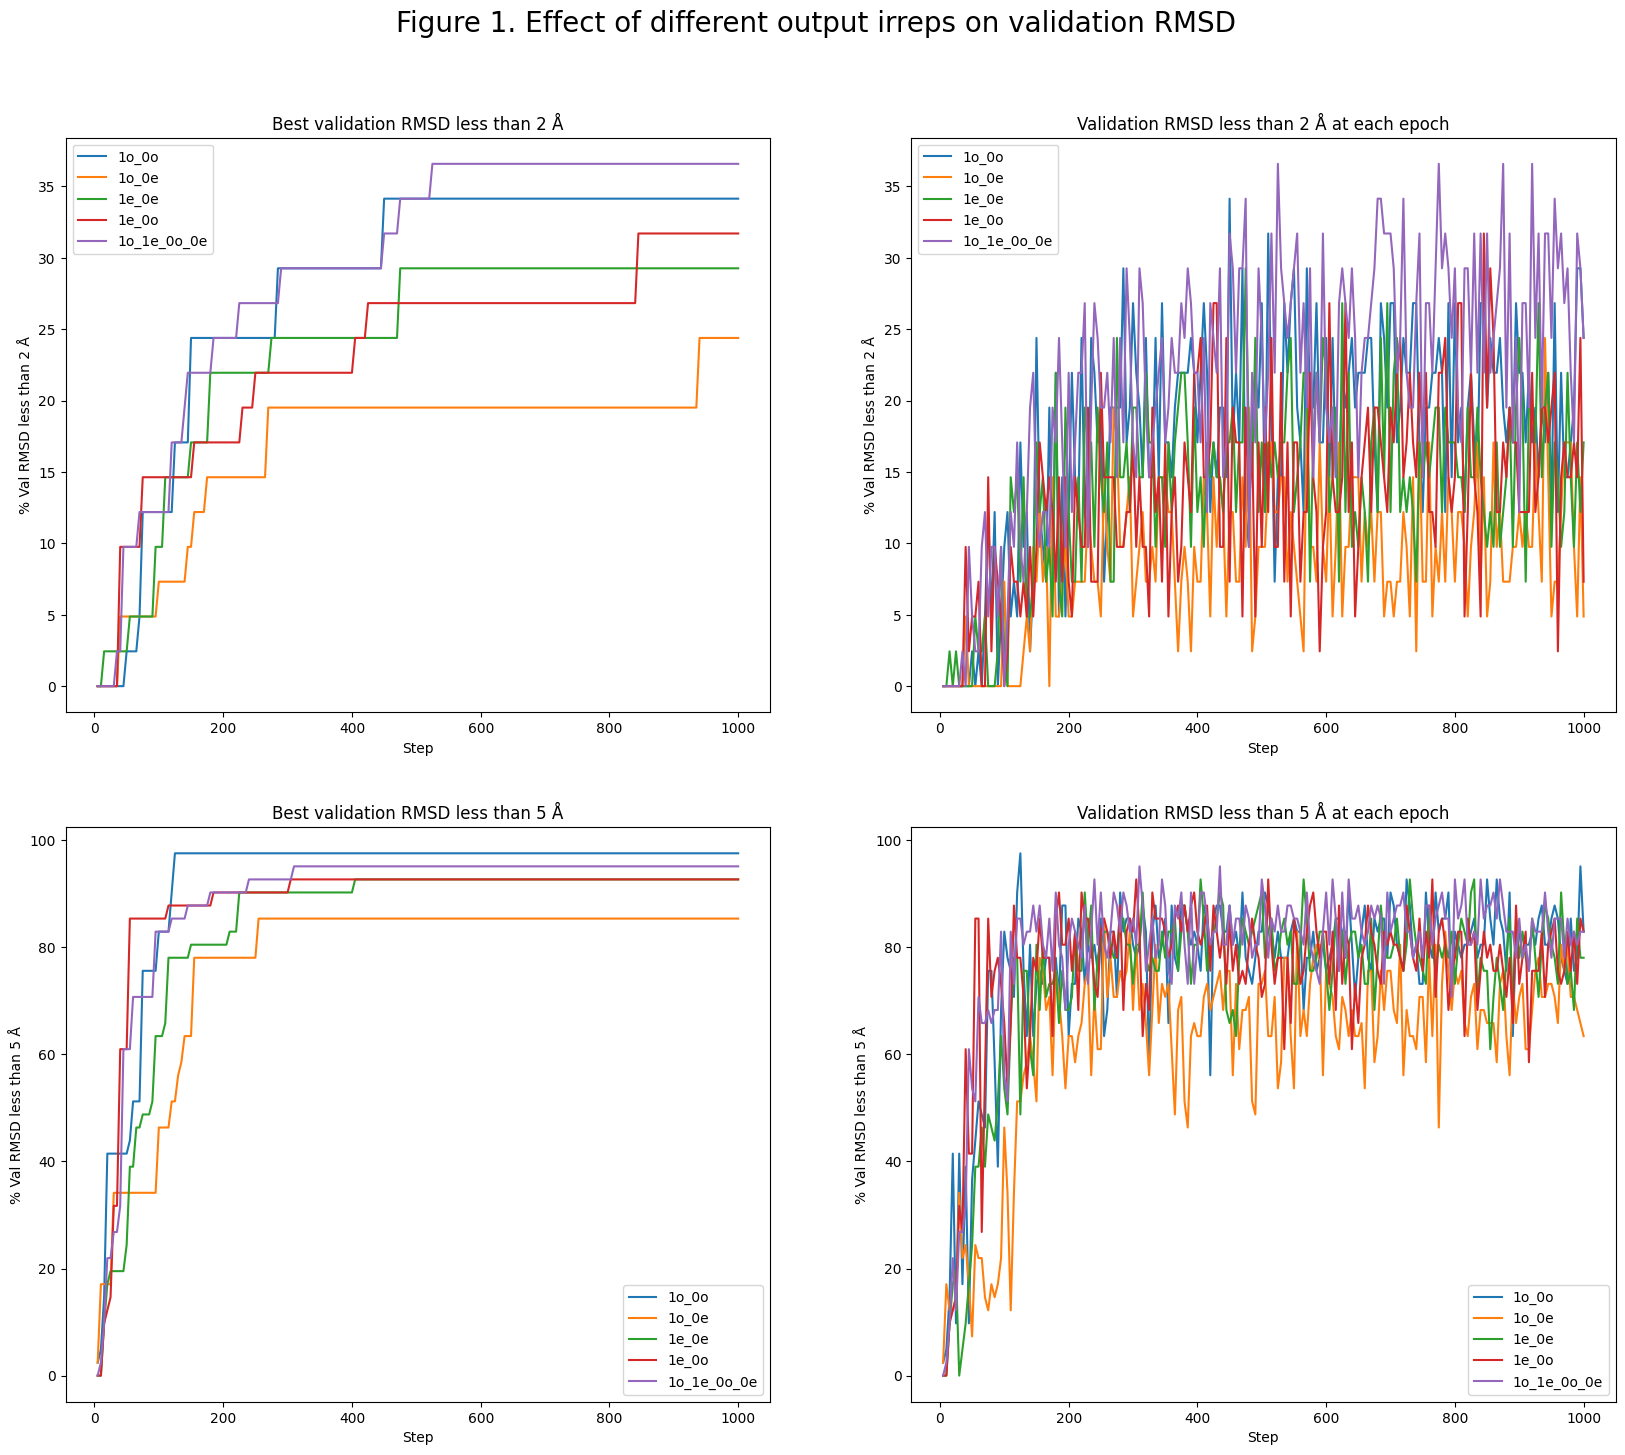

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

rmsd = 2
df = valinf_rmsds_lt2

suffix = "_best"
axs[0,0].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2_1o_0o - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1o_0o"
)
axs[0,0].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2_1o_0e - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1o_0e"
)
axs[0,0].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2_1e_0e - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1e_0e"
)
axs[0,0].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2_1e_0o - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1e_0o"
)
axs[0,0].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1o_1e_0o_0e"
)
axs[0,0].set_xlabel("Step")
axs[0,0].set_ylabel(f"% Val RMSD less than {rmsd} Å")
axs[0,0].set_title(f"Best validation RMSD less than {rmsd} Å")
axs[0,0].legend()

suffix = ""
axs[0,1].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2_1o_0o - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1o_0o"
)
axs[0,1].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2_1o_0e - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1o_0e"
)
axs[0,1].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2_1e_0e - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1e_0e"
)
axs[0,1].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2_1e_0o - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1e_0o"
)
axs[0,1].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1o_1e_0o_0e"
)
axs[0,1].set_xlabel("Step")
axs[0,1].set_ylabel(f"% Val RMSD less than {rmsd} Å")
axs[0,1].set_title(f"Validation RMSD less than {rmsd} Å at each epoch")
axs[0,1].legend()


rmsd = 5
df = valinf_rmsds_lt5

suffix = "_best"
axs[1,0].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2_1o_0o - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1o_0o"
)
axs[1,0].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2_1o_0e - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1o_0e"
)
axs[1,0].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2_1e_0e - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1e_0e"
)
axs[1,0].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2_1e_0o - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1e_0o"
)
axs[1,0].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1o_1e_0o_0e"
)
axs[1,0].set_xlabel("Step")
axs[1,0].set_ylabel(f"% Val RMSD less than {rmsd} Å")
axs[1,0].set_title(f"Best validation RMSD less than {rmsd} Å")
axs[1,0].legend()

suffix = ""
axs[1,1].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2_1o_0o - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1o_0o"
)
axs[1,1].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2_1o_0e - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1o_0e"
)
axs[1,1].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2_1e_0e - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1e_0e"
)
axs[1,1].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2_1e_0o - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1e_0o"
)
axs[1,1].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1o_1e_0o_0e"
)
axs[1,1].set_xlabel("Step")
axs[1,1].set_ylabel(f"% Val RMSD less than {rmsd} Å")
axs[1,1].set_title(f"Validation RMSD less than {rmsd} Å at each epoch")
axs[1,1].legend()

fig.suptitle("Figure 1. Effect of different output irreps on validation RMSD", fontsize=20)
fig.subplots_adjust(top=0.9)
plt.show()

In the above figure 1 the same `lmax = 1` was used meaning in the final interaction layer the irrep sequence was `0o + 0e + 1o + 1e`. We experimented with the out irrep sequence used in the final output layer for predicting the final translation, rotation, and torsional score. The following experiments were run:
* `2x1o` for translation score $\in \mathbb{R}^3$ and rotation score $\in \mathbb{R}^3$ for the ligand and `1o` for the torsional score $\in \mathbb{R}$ for each torsion angle in the ligand
* `2x1e` for translation score $\in \mathbb{R}^3$ and rotation score $\in \mathbb{R}^3$ for the ligand and `1o` for the torsional score $\in \mathbb{R}$ for each torsion angle in the ligand
* `2x1o` for translation score $\in \mathbb{R}^3$ and rotation score $\in \mathbb{R}^3$ for the ligand and `1e` for the torsional score $\in \mathbb{R}$ for each torsion angle in the ligand
* `2x1e` for translation score $\in \mathbb{R}^3$ and rotation score $\in \mathbb{R}^3$ for the ligand and `1e` for the torsional score $\in \mathbb{R}$ for each torsion angle in the ligand
* `2x1o+2x1e` for translation and rotation score $\in \mathbb{R}^3$ for the ligand and `1o+1e` for the torsional score $\in \mathbb{R}$ for each torsion angle in the ligand

Interestingly using the `2x1o` vector and `0o` pseudoscalar produced results that were most similar to using all irreps for the output. Furthermore using the `0o` irrep rather than the `0e` irrep always seems to perform better. The effects of using `1o` v.s. `1e` are not as obvious. Surprisingly, the `2x1o` vector and `Oe` scalar irreps produced the worst results. While these are interesting empirical results, it is still unclear why the pseudoscalar and pseudovector irreps would yield better performance. We will investigate this further to provide justification.

In [44]:
for col in valinf_rmsds_lt2.columns:
    if "lmax2_ns8_nv2" in col:
        print(col)

lmax2_ns8_nv2 - valinf_rmsds_lt2
lmax2_ns8_nv2 - valinf_rmsds_lt2__MIN
lmax2_ns8_nv2 - valinf_rmsds_lt2__MAX
lmax2_ns8_nv2 - valinf_rmsds_lt2_best
lmax2_ns8_nv2 - valinf_rmsds_lt2__MIN_best
lmax2_ns8_nv2 - valinf_rmsds_lt2__MAX_best


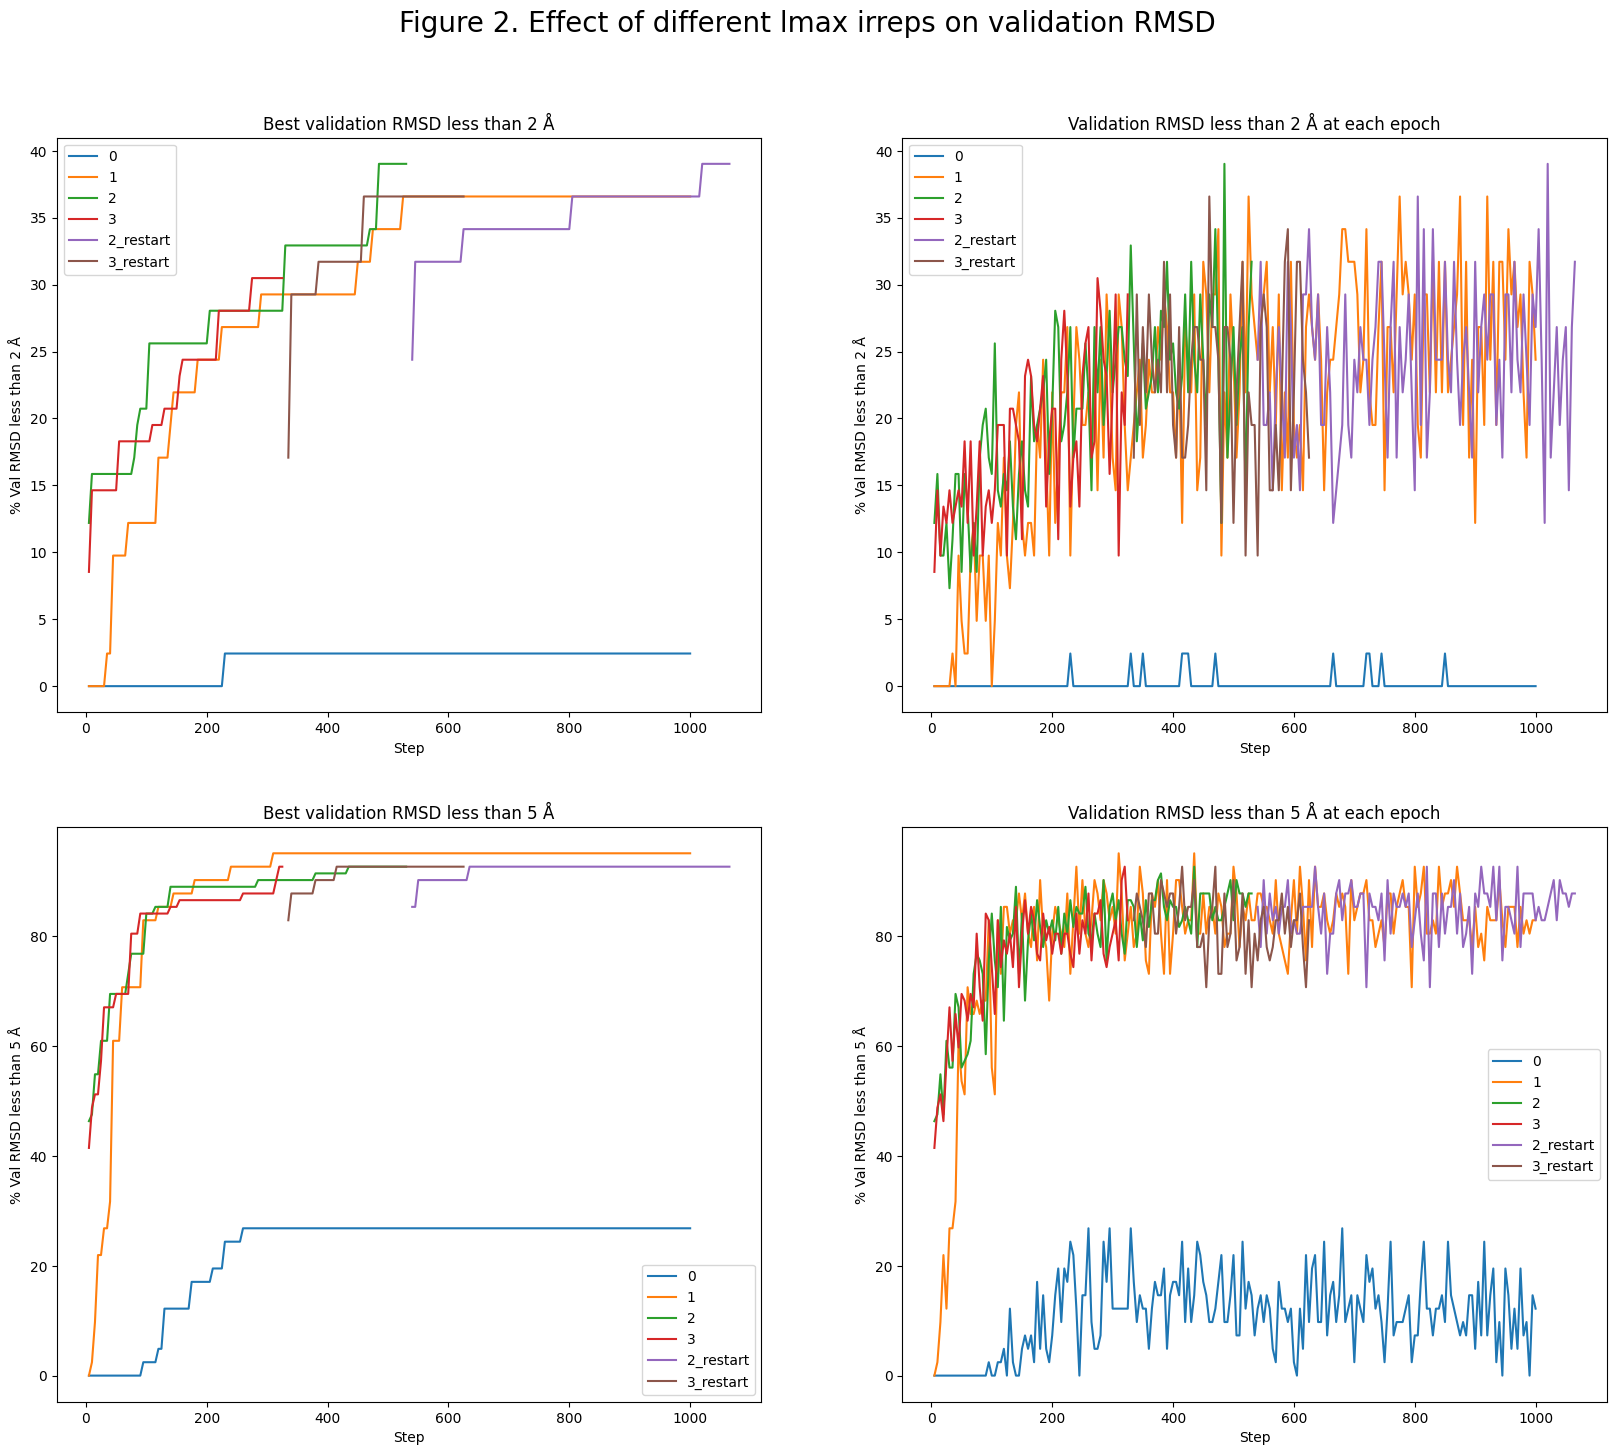

In [74]:
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

rmsd = 2
df = valinf_rmsds_lt2

suffix = "_best"
axs[0,0].plot(
    df["Step"],
    df[f"lmax0_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="0"
)
axs[0,0].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1"
)
axs[0,0].plot(
    df["Step"],
    df[f"lmax2_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="2"
)
axs[0,0].plot(
    df["Step"],
    df[f"lmax3_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="3"
)
axs[0,0].plot(
    valinf_rmsds_lt2_2["Step lmax2"],
    valinf_rmsds_lt2_2[f"lmax2_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="2_restart"
)
axs[0,0].plot(
    valinf_rmsds_lt2_2["Step lmax3"],
    valinf_rmsds_lt2_2[f"lmax3_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="3_restart"
)
axs[0,0].set_xlabel("Step")
axs[0,0].set_ylabel(f"% Val RMSD less than {rmsd} Å")
axs[0,0].set_title(f"Best validation RMSD less than {rmsd} Å")
axs[0,0].legend()

suffix = ""
axs[0,1].plot(
    df["Step"],
    df[f"lmax0_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="0"
)
axs[0,1].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1"
)
axs[0,1].plot(
    df["Step"],
    df[f"lmax2_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="2"
)
axs[0,1].plot(
    df["Step"],
    df[f"lmax3_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="3"
)
axs[0,1].plot(
    valinf_rmsds_lt2_2["Step lmax2"],
    valinf_rmsds_lt2_2[f"lmax2_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="2_restart"
)
axs[0,1].plot(
    valinf_rmsds_lt2_2["Step lmax3"],
    valinf_rmsds_lt2_2[f"lmax3_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="3_restart"
)
axs[0,1].set_xlabel("Step")
axs[0,1].set_ylabel(f"% Val RMSD less than {rmsd} Å")
axs[0,1].set_title(f"Validation RMSD less than {rmsd} Å at each epoch")
axs[0,1].legend()


rmsd = 5
df = valinf_rmsds_lt5

suffix = "_best"
axs[1,0].plot(
    df["Step"],
    df[f"lmax0_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="0"
)
axs[1,0].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1"
)
axs[1,0].plot(
    df["Step"],
    df[f"lmax2_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="2"
)
axs[1,0].plot(
    df["Step"],
    df[f"lmax3_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="3"
)
axs[1,0].plot(
    valinf_rmsds_lt5_2["Step lmax2"],
    valinf_rmsds_lt5_2[f"lmax2_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="2_restart"
)
axs[1,0].plot(
    valinf_rmsds_lt5_2["Step lmax3"],
    valinf_rmsds_lt5_2[f"lmax3_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="3_restart"
)
axs[1,0].set_xlabel("Step")
axs[1,0].set_ylabel(f"% Val RMSD less than {rmsd} Å")
axs[1,0].set_title(f"Best validation RMSD less than {rmsd} Å")
axs[1,0].legend()

suffix = ""
axs[1,1].plot(
    df["Step"],
    df[f"lmax0_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="0"
)
axs[1,1].plot(
    df["Step"],
    df[f"lmax1_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="1"
)
axs[1,1].plot(
    df["Step"],
    df[f"lmax2_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="2"
)
axs[1,1].plot(
    df["Step"],
    df[f"lmax3_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="3"
)
axs[1,1].plot(
    valinf_rmsds_lt5_2["Step lmax2"],
    valinf_rmsds_lt5_2[f"lmax2_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="2_restart"
)
axs[1,1].plot(
    valinf_rmsds_lt5_2["Step lmax3"],
    valinf_rmsds_lt5_2[f"lmax3_ns8_nv2 - valinf_rmsds_lt{rmsd}{suffix}"],
    label="3_restart"
)
axs[1,1].set_xlabel("Step")
axs[1,1].set_ylabel(f"% Val RMSD less than {rmsd} Å")
axs[1,1].set_title(f"Validation RMSD less than {rmsd} Å at each epoch")
axs[1,1].legend()

fig.suptitle("Figure 2. Effect of different lmax irreps on validation RMSD", fontsize=20)
fig.subplots_adjust(top=0.9)
plt.show()

In the above figure 2 different `l_max` were used which refers to the highest $l$ in the irrep sequence used in the interaction layers, the exact irrep sequence is written above in "Implementation".
* $l_{max}=0$ performs the worst in both measures of RMSD. This was expected as it is an invariant model and therefore the output does not change with respect to transformations in SE(3). However, this model is not weight normalised, that is this model is also less expressive as it has fewer parameters. We will run experiments that account for the difference in number of parameters as well in the future.
* $l_{max}=1$ performs the best with limited training time required. This is the irrep sequence that is the default in DiffDock.
* $l_{max}=2, 3$ performs slightly better than $l_{max}=1$. The addition of the higher order irreps slows down training time as the higher order representations are also combinatorially larger. Hence they were trained for 4 days instead of 2 days. It is unclear if the higher order representations improve the model or if it is because of the larger number of parameters.

For more conclusive evidence on the effects of $l_{max}$ on model performance we will run weight-controlled experiments in the future.

# TODO: 
* update for more detail on future experiments we will run 
* update for initial conclusions from these preliminary results
## Conclusions
We expect that model performance will benefit from being equivariant ($l>0$) compared to invariant ($l=0$). We also expect to see learning curves for model performance will follow a power law. Higher order representations may be able to achieve higher accuracy; however, probably with diminishing returns as protein-ligand docking is a relatively low symmetry problem. We will also be interested in forming empirical conclusions on how learning exponent is affected by orders of $l$. 
                                                                                                    Finally, there is limited related work on experimentation with multiplicity of irreps; thus, we are interested in exploring empirical conclusions of possible effects from our experiments.